In [1]:
#Import code from last time
%run I1-2.ipynb

Optimization terminated successfully.
         Current function value: 1.220142
         Iterations: 37
         Function evaluations: 42
         Gradient evaluations: 42


<Figure size 640x480 with 1 Axes>

Optimization terminated successfully.
         Current function value: 1.058576
         Iterations: 50
         Function evaluations: 55
         Gradient evaluations: 55


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
testX

array([[0.54225352],
       [0.26056338],
       [0.3943662 ],
       [0.62676056],
       [0.79577465],
       [0.70422535],
       [0.53521127],
       [0.40140845],
       [0.12676056],
       [0.33098592],
       [0.41549296],
       [0.55633803],
       [0.5915493 ]])

In [3]:
testY

array([[0.26056338],
       [0.3943662 ],
       [0.62676056],
       [0.79577465],
       [0.70422535],
       [0.53521127],
       [0.40140845],
       [0.12676056],
       [0.33098592],
       [0.41549296],
       [0.55633803],
       [0.5915493 ],
       [0.51408451]])

In [4]:
trainX

array([[0.14788732],
       [0.06338028],
       [0.43661972],
       [0.57042253],
       [0.66901409],
       [0.6971831 ],
       [0.97183099],
       [0.5915493 ],
       [0.28169014],
       [0.26056338],
       [0.46478873],
       [0.99295775],
       [0.67605634],
       [0.25352113],
       [0.45070423],
       [0.        ],
       [0.48591549],
       [0.78169014],
       [0.8028169 ],
       [0.3028169 ],
       [0.47183099],
       [0.41549296],
       [0.64788732],
       [0.61267606],
       [1.        ],
       [0.47887324],
       [0.3028169 ],
       [0.38028169],
       [0.5915493 ],
       [0.8028169 ],
       [0.47183099],
       [0.26760563],
       [0.4084507 ],
       [0.32394366],
       [0.45774648],
       [0.81690141],
       [0.75352113],
       [0.43661972],
       [0.45774648],
       [0.38732394],
       [0.46478873],
       [0.73239437],
       [0.51408451],
       [0.28169014],
       [0.19014085],
       [0.51408451],
       [0.50704225],
       [0.753

In [5]:
trainY

array([[0.06338028],
       [0.43661972],
       [0.57042253],
       [0.66901409],
       [0.6971831 ],
       [0.97183099],
       [0.5915493 ],
       [0.28169014],
       [0.26056338],
       [0.46478873],
       [0.99295775],
       [0.67605634],
       [0.25352113],
       [0.45070423],
       [0.        ],
       [0.48591549],
       [0.78169014],
       [0.8028169 ],
       [0.3028169 ],
       [0.47183099],
       [0.41549296],
       [0.64788732],
       [0.61267606],
       [1.        ],
       [0.47887324],
       [0.3028169 ],
       [0.38028169],
       [0.5915493 ],
       [0.8028169 ],
       [0.47183099],
       [0.26760563],
       [0.4084507 ],
       [0.32394366],
       [0.45774648],
       [0.81690141],
       [0.75352113],
       [0.43661972],
       [0.45774648],
       [0.38732394],
       [0.46478873],
       [0.73239437],
       [0.51408451],
       [0.28169014],
       [0.19014085],
       [0.51408451],
       [0.50704225],
       [0.75352113],
       [0.542

In [6]:
#Regularization Parameter:
Lambda = 0.0001

In [7]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 1
        self.outputLayerSize = 1
        self.hiddenLayerSize = 2
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [10]:
NN = Neural_Network(Lambda=0.0001)

In [11]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [12]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

4.0318576514619496e-10

In [13]:
T = trainer(NN)

In [14]:
T.train(X,y,testX,testY)

Optimization terminated successfully.
         Current function value: 0.020740
         Iterations: 51
         Function evaluations: 59
         Gradient evaluations: 59


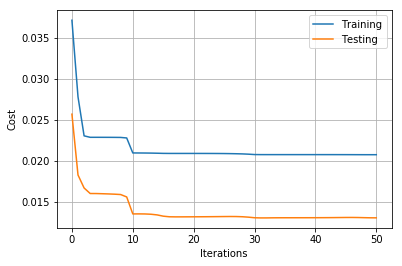

In [15]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [16]:
T.J

[array([0.03716641]),
 array([0.02780768]),
 array([0.02304346]),
 array([0.0228649]),
 array([0.02286474]),
 array([0.02286348]),
 array([0.02286128]),
 array([0.02285725]),
 array([0.02284965]),
 array([0.02278501]),
 array([0.02095536]),
 array([0.02095039]),
 array([0.02094468]),
 array([0.02093548]),
 array([0.02092071]),
 array([0.02090121]),
 array([0.02089546]),
 array([0.02089487]),
 array([0.02089476]),
 array([0.02089458]),
 array([0.02089424]),
 array([0.02089363]),
 array([0.02089251]),
 array([0.02089048]),
 array([0.02088686]),
 array([0.0208807]),
 array([0.02087093]),
 array([0.02085667]),
 array([0.02083678]),
 array([0.02080363]),
 array([0.02075876]),
 array([0.02075054]),
 array([0.02074989]),
 array([0.02074973]),
 array([0.0207497]),
 array([0.02074969]),
 array([0.02074968]),
 array([0.02074967]),
 array([0.02074965]),
 array([0.0207496]),
 array([0.02074951]),
 array([0.02074935]),
 array([0.02074907]),
 array([0.02074858]),
 array([0.0207478]),
 array([0.02074

In [17]:
T.testJ

[array([0.02569189]),
 array([0.01825987]),
 array([0.01667388]),
 array([0.01599853]),
 array([0.01599427]),
 array([0.0159723]),
 array([0.01594717]),
 array([0.01591644]),
 array([0.01587408]),
 array([0.01557815]),
 array([0.01350575]),
 array([0.01350941]),
 array([0.01350041]),
 array([0.01346451]),
 array([0.01338494]),
 array([0.01323072]),
 array([0.01315601]),
 array([0.01314503]),
 array([0.01314681]),
 array([0.01314976]),
 array([0.01315318]),
 array([0.01315717]),
 array([0.01316205]),
 array([0.01316809]),
 array([0.01317539]),
 array([0.0131833]),
 array([0.013189]),
 array([0.01318413]),
 array([0.0131601]),
 array([0.01310955]),
 array([0.01303727]),
 array([0.01301697]),
 array([0.01301819]),
 array([0.01302975]),
 array([0.01303463]),
 array([0.0130361]),
 array([0.01303708]),
 array([0.01303804]),
 array([0.01303915]),
 array([0.01304058]),
 array([0.01304258]),
 array([0.01304547]),
 array([0.01304966]),
 array([0.01305561]),
 array([0.01306327]),
 array([0.013070

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.00766513900870991

In [19]:
yHat=NN.forward(X)

In [20]:
yHat

array([[0.39270019],
       [0.36268244],
       [0.49316231],
       [0.53466709],
       [0.56215159],
       [0.56948761],
       [0.6290797 ],
       [0.54078952],
       [0.44036773],
       [0.4329069 ],
       [0.50226735],
       [0.63281631],
       [0.56400737],
       [0.43041116],
       [0.49773743],
       [0.34064685],
       [0.50897427],
       [0.59010118],
       [0.59492989],
       [0.44778228],
       [0.5045149 ],
       [0.48621834],
       [0.55649741],
       [0.54678641],
       [0.63403707],
       [0.50675059],
       [0.44778228],
       [0.47444268],
       [0.54078952],
       [0.59492989],
       [0.5045149 ],
       [0.43539846],
       [0.48388284],
       [0.45514227],
       [0.50000814],
       [0.59807779],
       [0.58346183],
       [0.49316231],
       [0.50000814],
       [0.47681698],
       [0.50226735],
       [0.57833047],
       [0.51774561],
       [0.44036773],
       [0.40781575],
       [0.51774561],
       [0.51557159],
       [0.583

In [21]:
y

array([[0.06338028],
       [0.43661972],
       [0.57042253],
       [0.66901409],
       [0.6971831 ],
       [0.97183099],
       [0.5915493 ],
       [0.28169014],
       [0.26056338],
       [0.46478873],
       [0.99295775],
       [0.67605634],
       [0.25352113],
       [0.45070423],
       [0.        ],
       [0.48591549],
       [0.78169014],
       [0.8028169 ],
       [0.3028169 ],
       [0.47183099],
       [0.41549296],
       [0.64788732],
       [0.61267606],
       [1.        ],
       [0.47887324],
       [0.3028169 ],
       [0.38028169],
       [0.5915493 ],
       [0.8028169 ],
       [0.47183099],
       [0.26760563],
       [0.4084507 ],
       [0.32394366],
       [0.45774648],
       [0.81690141],
       [0.75352113],
       [0.43661972],
       [0.45774648],
       [0.38732394],
       [0.46478873],
       [0.73239437],
       [0.51408451],
       [0.28169014],
       [0.19014085],
       [0.51408451],
       [0.50704225],
       [0.75352113],
       [0.542

In [22]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

0.0402379306505153

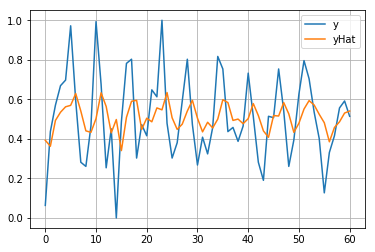

In [23]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [24]:
prediksi=NN.forward(dataprediksi)

In [25]:
prediksi

array([[0.51774561],
       [0.47681698],
       [0.47205927],
       [0.46966701]])

In [26]:
from sklearn.metrics import mean_squared_error 

In [27]:
Y_true= ([	0.387323944	]	,
[	0.373239437	]	,
[	0.366197183	]	,
[	0.443661972	]	,
)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.009905290503523408

In [28]:
dataprediksi

array([[0.51408451],
       [0.38732394],
       [0.37323944],
       [0.36619718]])

In [29]:
a=np.array([	0.443661972	])

In [30]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

array([0.49545542])

In [31]:
#prediksi 2
c=prediksi
b=a[1:]
d=np.concatenate((b,c))
prediksi=NN.forward(d)
prediksi

array([0.51196716])

In [32]:
#prediksi 3
c=prediksi
b=d[1:]
e=np.concatenate((b,c))
prediksi=NN.forward(e)
prediksi

array([0.5170933])

In [33]:
#prediksi 4
c=prediksi
b=e[1:]
f=np.concatenate((b,c))
prediksi=NN.forward(f)
prediksi

array([0.51867057])

In [34]:
#prediksi 5
c=prediksi
b=f[1:]
g=np.concatenate((b,c))
prediksi=NN.forward(g)
prediksi

array([0.51915452])

In [35]:
#prediksi 6
c=prediksi
b=g[1:]
h=np.concatenate((b,c))
prediksi=NN.forward(h)
prediksi

array([0.51930287])